В данном примере мы рассмотрим аналитически заданную функцию. Зададим величины ошибки случайным образом и найдем первую и вторую производную.

Импортируем необходимые библиотеки

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from random import randint

import regularization as reg

Зададим аналитически функцию и ее теоретические производные:

In [2]:
x = np.arange(30) 
y = 4*x**3 + 5*x**2 + 6*x + 7
y_1 = 12*x**2 + 10*x + 6
y_2 = 24*x + 10

In [3]:
y

array([     7,     22,     71,    178,    367,    662,   1087,   1666,
         2423,   3382,   4567,   6002,   7711,   9718,  12047,  14722,
        17767,  21206,  25063,  29362,  34127,  39382,  45151,  51458,
        58327,  65782,  73847,  82546,  91903, 101942])

Зададим размеры ошибок:

In [10]:
per = 0.02

err = []
for i in range(len(y)):
    if i == 0:
        err.append(per*max(y))
    else:
        err.append(err[i-1]+per*max(y)/len(x))

Выберем случайное число из промежутка [y-err; y+err], это и будут наши сгенерированные данные.

In [11]:
data = []
for i in range(len(y)):
    data.append(randint(int(y[i]-err[i]), int(y[i]+err[i])))

height = data
t_height = x
err_height = err

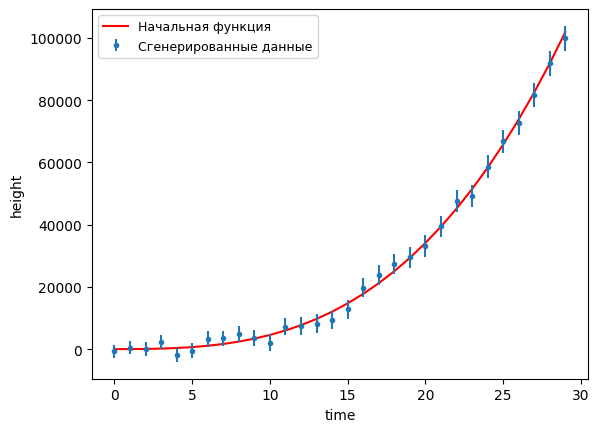

In [12]:
plt.plot(t_height, y, label='Начальная функция', c='r')
plt.errorbar(t_height,height, yerr=err_height, fmt='.', label='Сгенерированные данные')

plt.xlabel('time')
plt.ylabel('height')
plt.legend(loc = 'best', prop={'size':9})
# plt.title('Парабола и сгенерированные точки с линейным ростом ошибки')

In [27]:
t_vel, vel, height_back = reg.regularization(height, t_height, err_height, alpha=3e7, ord=3, print_parameters=True, mk=False)

Optimization terminated successfully
quotient = 0.2889746164153667
reduced chi2 for integrated regularization results =  0.3453830715024716


In [28]:
t_vel, vel_mk, err_vel = reg.regularization(height, t_height, err_height, alpha=3e7, ord=3, print_parameters=False, mk=True)

100%|██████████| 100/100 [00:19<00:00,  5.03it/s]


Text(0.5, 0, 'time')

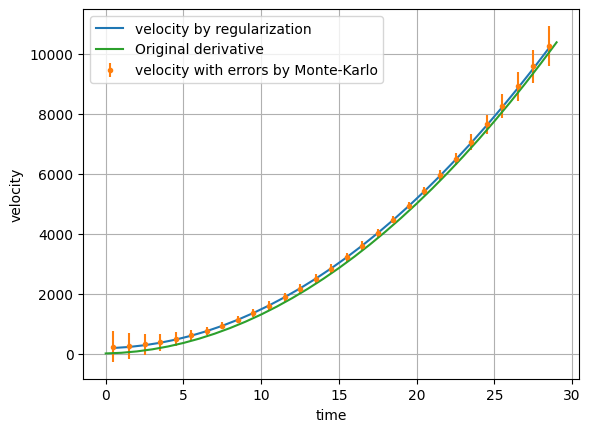

In [29]:
fig, ax = plt.subplots()
ax.plot(t_vel,vel, label = 'velocity by regularization')
ax.errorbar(t_vel,vel_mk,err_vel,fmt='.', label = 'velocity with errors by Monte-Karlo')
ax.plot(x,y_1, label='Original derivative')
ax.legend()
ax.grid()
ax.set_ylabel('velocity')
ax.set_xlabel('time')

Text(0, 0.5, 'error overrun')

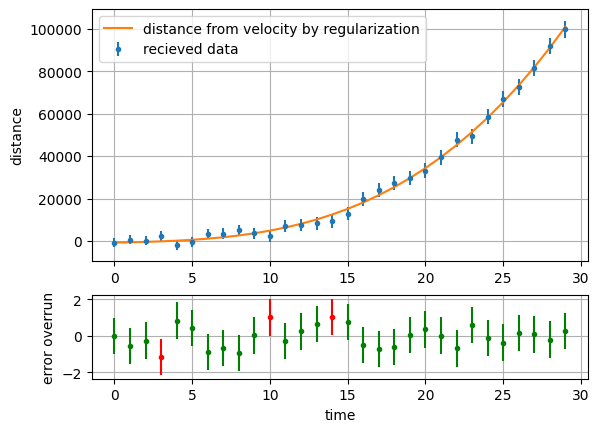

In [31]:
fig, ax = plt.subplots(2,1,gridspec_kw={'height_ratios': [3, 1]})
ax[0].errorbar(t_height, height,err_height,fmt='.', label = 'recieved data')
ax[0].plot(t_height, height_back, label = 'distance from velocity by regularization')
ax[0].legend()
ax[0].grid()
ax[0].set_ylabel('distance')

sigma = (height_back-height)/err_height
ax[1].errorbar(t_height[np.abs(sigma)<1], sigma[np.abs(sigma)<1],1,fmt='.',c='green')
ax[1].errorbar(t_height[np.abs(sigma)>=1], sigma[np.abs(sigma)>=1],1,fmt='.',c='red')

# ax[1].errorbar(t_height, (height_back-height)/err_height,1,fmt='.')
ax[1].grid()
ax[1].set_xlabel('time')
ax[1].set_ylabel('error overrun')

In [35]:
t_acc, acc, vel_back = reg.regularization(vel, t_vel, err_vel, alpha=1e8, ord=2, print_parameters=True, mk=False)

Optimization terminated successfully
quotient = 0.00013664580649755815
reduced chi2 for integrated regularization results =  0.00016943166663605042


In [36]:
t_acc, acc_mk, err_acc = reg.regularization(vel, t_vel, err_vel, alpha=1e8, ord=2, print_parameters=True, mk=True)

Optimization terminated successfully
quotient = 0.00013664580649755815
reduced chi2 for integrated regularization results =  0.00016943166663605042


100%|██████████| 100/100 [00:11<00:00,  8.51it/s]


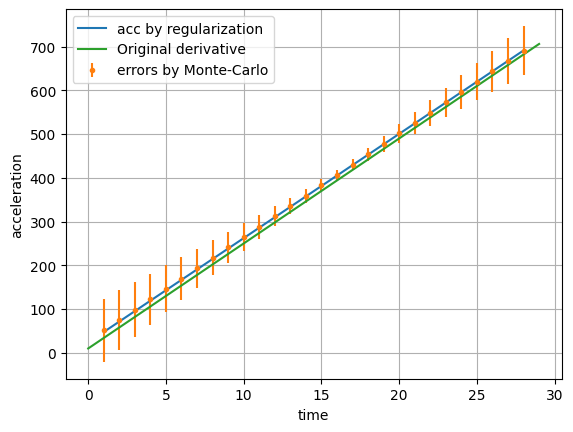

In [40]:
plt.plot(t_acc,acc, label = 'acc by regularization')
#plt.plot(t_acc,acc0)
plt.errorbar(t_acc,acc_mk,err_acc,fmt='.', label = 'errors by Monte-Carlo')
plt.plot(x,y_2, label='Original derivative')

plt.xlabel('time')
plt.ylabel('acceleration')
plt.grid()

plt.legend()
plt.show()

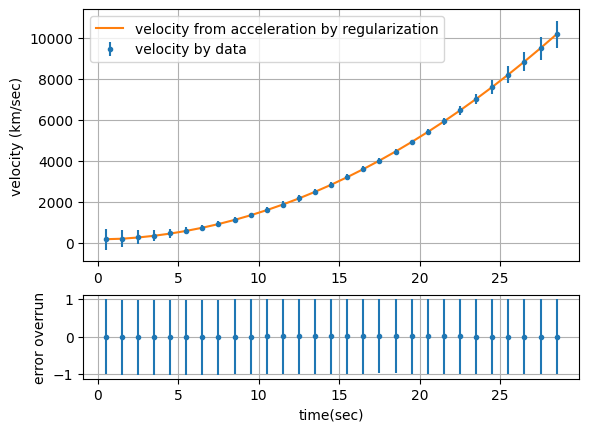

In [41]:
fig, ax = plt.subplots(2,1,gridspec_kw={'height_ratios': [3, 1]})
ax[0].errorbar(t_vel, vel,err_vel,fmt='.', label = 'velocity by data')
ax[0].plot(t_vel, vel_back, label = 'velocity from acceleration by regularization')
ax[0].set_ylabel('velocity (km/sec)')
ax[0].grid()
ax[0].legend()

ax[1].errorbar(t_vel, (vel_back-vel)/err_vel,1,fmt='.')
ax[1].set_ylabel('error overrun')
ax[1].set_xlabel('time(sec)')
plt.grid()